[Open in Google Colab](https://github.com/mooziri/Course_PfN/blob/main/s(z)_nb(z)_project.ipynb)

# Course Project

In [1]:
# imports

from scipy.io import loadmat
import numpy as np

from  scipy.ndimage import gaussian_filter as smooth

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

In [2]:
datadir = '../Data/data_steinmetz.mat'
tmp_data = loadmat(datadir)

vars_to_include = list(tmp_data.keys())[3:]
dat = {}
for item in vars_to_include:
  dat[item] = tmp_data[item]

print(f'Neuronal data shape (Neuron, Trial, Time): {dat["spks"].shape}')
print(f'Regions: {np.unique(dat["brain_area"]).tolist()}')

tr_num = dat["spks"].shape[1]

# timing params (in ms)
bin_len = 10
prestim_time = 500
fr_dt = 1000 / bin_len
timestamps = (np.arange(dat["spks"].shape[2])*bin_len - prestim_time) / 1000

brain_reg = [tmp_nm.strip() for tmp_nm in dat['brain_area']]
dat["spks"] = dat["spks"] * fr_dt

Neuronal data shape (Neuron, Trial, Time): (1156, 250, 250)
Regions: ['CA1 ', 'CA3 ', 'DG  ', 'ILA ', 'LD  ', 'LP  ', 'LSr ', 'MOs ', 'PL  ', 'PO  ', 'SUB ', 'TT  ', 'VISa', 'VISp', 'root']


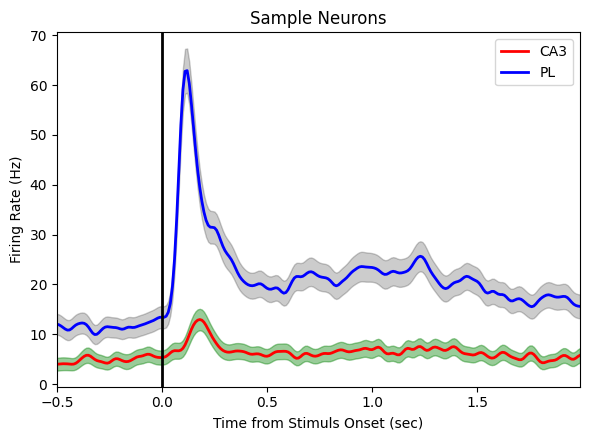

In [3]:
smooth_win = 2

tmp_reg = 'CA3'; tmp_idx = 10
idx_reg = [idx for idx, reg in enumerate(brain_reg) if reg==tmp_reg]
tmp_n = dat['spks'][idx_reg[tmp_idx]]

plt.figure(figsize=(6,4.5))
plt.plot(timestamps, smooth(tmp_n.mean(axis=0), smooth_win), color='r', lw=2, label=tmp_reg)
plt.fill_between(timestamps, smooth(tmp_n.mean(axis=0) + tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win)
                 , smooth(tmp_n.mean(axis=0) - tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win)
                 , color='g', alpha=.4)

tmp_reg = 'PL'; tmp_idx = 1
idx_reg = [idx for idx, reg in enumerate(brain_reg) if reg==tmp_reg]
tmp_n = dat['spks'][idx_reg[tmp_idx]]

plt.plot(timestamps, smooth(tmp_n.mean(axis=0), smooth_win), color='b', lw=2, label=tmp_reg)
plt.fill_between(timestamps, smooth(tmp_n.mean(axis=0) + tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win)
                 , smooth(tmp_n.mean(axis=0) - tmp_n.std(axis=0)/np.sqrt(tr_num), smooth_win)
                 , color='k', alpha=.2)

plt.xlabel('Time from Stimuls Onset (sec)')
plt.xlim([min(timestamps), max(timestamps)])
plt.ylabel('Firing Rate (Hz)')
# plt.ylim([0,80])

plt.axvline(0, color='k', lw=2)
plt.title('Sample Neurons')
plt.legend()
plt.tight_layout()

# Task 1: baseline correction
Make the following plot by `z-scoring the firing rate to baseline activity`. 
<br>* Note: neuron indexes are the same as above. 
<br>See the solution [here](https://github.com/mooziri/Course_PfN/blob/main/solutions/s(z)_nb(z)_project_task01.ipynb). 
<br>
<br>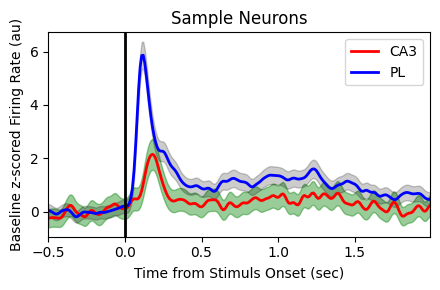

In [4]:
# code here


# Task 2: activity heatmap
Make the following activity heatmap for area `PL`. 
<br>* Note: colormap name: `bwr`.
<br>See the solution [here](https://github.com/mooziri/Course_PfN/blob/main/solutions/s(z)_nb(z)_project_task02.ipynb). 
<br>
<br>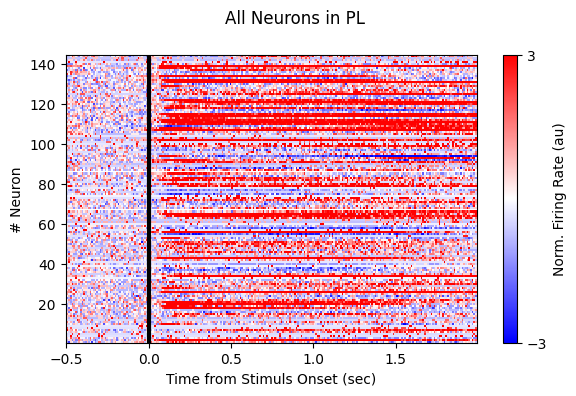

In [5]:
# code here
